In [2]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
df = pd.read_csv('/home/vamshi/Downloads/Week7_train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


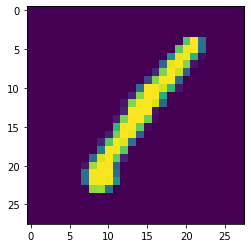

In [7]:
plt.imshow(df.iloc[0, 1:].values.reshape(28, 28))

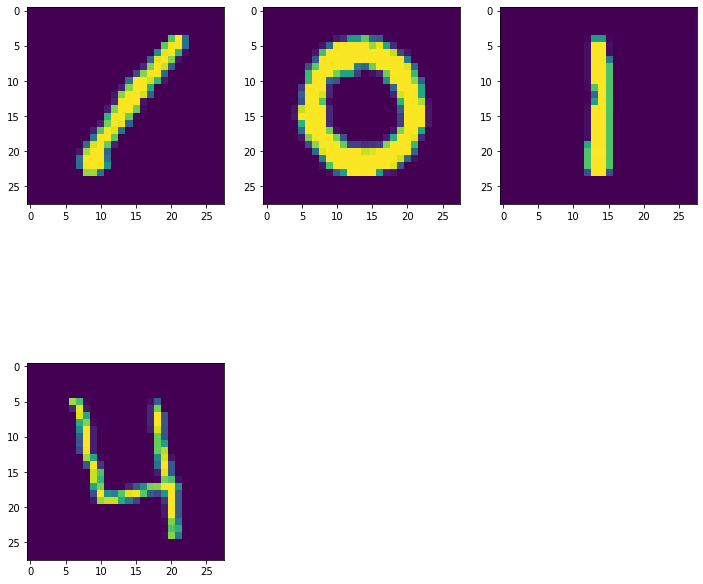

In [8]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,3, i+1)
    plt.imshow(df.iloc[i, 1:].values.reshape(28, 28))
plt.show()

In [9]:
df.shape

(42000, 785)

In [10]:
df = df.sample(frac=0.1)

In [11]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35769,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34781,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38822,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25264,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1405,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35959,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35174,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26397,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['label'].unique()

array([0, 1, 2, 5, 8, 6, 9, 4, 7, 3])

In [13]:
df['label'].value_counts()

label
7    442
1    437
9    432
8    429
0    424
2    424
3    422
4    420
6    408
5    362
Name: count, dtype: int64

In [14]:
X = df.drop(columns=['label'])
y = df['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [17]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_predict = model.predict(X_test)

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.91      1.00      0.95       102
           2       0.98      0.94      0.96       105
           3       0.91      0.92      0.91       106
           4       0.93      0.91      0.92       125
           5       0.90      0.88      0.89        86
           6       0.93      0.95      0.94        94
           7       0.91      0.99      0.95        99
           8       0.93      0.78      0.85       103
           9       0.88      0.88      0.88       120

    accuracy                           0.92      1050
   macro avg       0.92      0.92      0.92      1050
weighted avg       0.92      0.92      0.92      1050



In [28]:
con_mat = confusion_matrix(y_test, y_predict)
con_mat_rounded = np.round(con_mat, 1)

<IPython.core.display.Javascript object>

<Axes: >

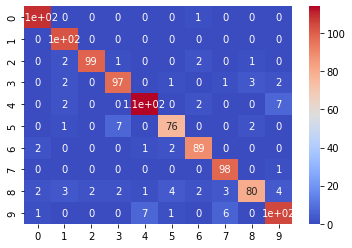

In [29]:
sns.heatmap(con_mat, annot=True,cmap='coolwarm')